In [82]:
# Walmart

In [83]:
import pandas as pd

In [84]:
df=pd.read_csv("Walmart.csv")

In [85]:
df.head()

,Respondent,Product_Quality,E_Commerce,Technical_Support,Complaint_Resolution,Advertising,Product_Line,Salesforce_Image,Competitive_Pricing,Warranty&Claims,Packaging,Order&Billing,Price_Flexibility,Delivery_Speed
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,4.3,5.0,5.1,3.7
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,4.0,3.9,4.3,4.9
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,4.6,5.4,4.0,4.5
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,3.6,4.3,4.1,3.0
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,4.5,3.5,3.5


In [86]:
df.shape

(200, 14)

# Scaling data is mandatory if they have different scale of measurement
### Not standadising data as they all have same scale of measurement


In [87]:
x=df[['Product_Quality','Product_Line']]

In [88]:
x

,Product_Quality,Product_Line
0,8.5,4.9
1,8.2,7.9
2,9.2,7.4
3,6.4,4.7
4,9.0,6.0
...,...,...
195,7.6,6.6
196,5.9,5.9
197,9.7,7.6
198,5.5,5.7


In [89]:
# build PCA
from sklearn.decomposition import PCA

In [90]:
pcaModel=PCA()
pcaModel.fit(x)

PCA()

In [91]:
# check for explained variance or eigenvalues
pcaModel.explained_variance_

array([2.75628888, 0.89199152])

In [92]:
pcaModel.explained_variance_ratio_

array([0.75550357, 0.24449643])

In [93]:
pcaModel.explained_variance_ratio_*100

array([75.55035742, 24.44964258])

In [94]:
import numpy as np

In [95]:
np.cumsum(pcaModel.explained_variance_ratio_*100)

array([ 75.55035742, 100.        ])

In [96]:
pcaModel.components_

array([[-0.7399445 , -0.67266792],
       [ 0.67266792, -0.7399445 ]])

In [97]:
pcaModel1=PCA(n_components=1)
pcaModel1.fit(x)

PCA(n_components=1)

In [98]:
pcaModel1.components_

array([[-0.7399445 , -0.67266792]])

In [99]:
x['C1']=pcaModel1.transform(x).flatten()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
x

,Product_Quality,Product_Line,C1
0,8.5,4.9,0.167085
1,8.2,7.9,-1.628936
2,9.2,7.4,-2.032546
3,6.4,4.7,1.855502
4,9.0,6.0,-0.942822
...,...,...,...
195,7.6,6.6,-0.310501
196,5.9,5.9,1.418273
197,9.7,7.6,-2.537052
198,5.5,5.7,1.848784


In [101]:
# build model with all features
x=df.iloc[:,1:]

In [102]:
x.head()

,Product_Quality,E_Commerce,Technical_Support,Complaint_Resolution,Advertising,Product_Line,Salesforce_Image,Competitive_Pricing,Warranty&Claims,Packaging,Order&Billing,Price_Flexibility,Delivery_Speed
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,4.3,5.0,5.1,3.7
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,4.0,3.9,4.3,4.9
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,4.6,5.4,4.0,4.5
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,3.6,4.3,4.1,3.0
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,4.5,3.5,3.5


In [103]:
x.shape

(200, 13)

In [104]:
pcaModel=PCA()
pcaModel.fit(x)

PCA()

In [105]:
pcaModel.explained_variance_

array([5.03307718, 4.17009745, 3.01231876, 2.08232407, 1.7598727 ,
       1.21633739, 0.73686911, 0.56591811, 0.27123224, 0.18682994,
       0.1684795 , 0.14154236, 0.00786803])

In [106]:
pcaModel.explained_variance_ratio_

array([0.26007016, 0.2154781 , 0.15565313, 0.10759826, 0.09093649,
       0.06285083, 0.03807565, 0.02924223, 0.01401517, 0.00965391,
       0.00870571, 0.0073138 , 0.00040656])

In [107]:
pcaModel.explained_variance_ratio_*100

array([26.00701604, 21.54781009, 15.56531314, 10.75982617,  9.09364906,
        6.28508266,  3.80756465,  2.92422327,  1.40151661,  0.96539136,
        0.87057061,  0.73138048,  0.04065587])

In [108]:
np.cumsum(pcaModel.explained_variance_ratio_*100)

array([ 26.00701604,  47.55482614,  63.12013928,  73.87996544,
        82.9736145 ,  89.25869716,  93.06626181,  95.99048508,
        97.39200169,  98.35739305,  99.22796366,  99.95934413,
       100.        ])

In [109]:
pcaModel8=PCA(n_components=8)
pcaModel8.fit(x)

PCA(n_components=8)

In [110]:
pd.DataFrame(pcaModel8.components_,columns=x.columns,index=["C1",'C2','C3','C4',"C5",'C6','C7','C8'])

,Product_Quality,E_Commerce,Technical_Support,Complaint_Resolution,Advertising,Product_Line,Salesforce_Image,Competitive_Pricing,Warranty&Claims,Packaging,Order&Billing,Price_Flexibility,Delivery_Speed
C1,-0.430251,0.006899,-0.312715,-0.233400,-0.012857,-0.492678,0.017316,0.521613,-0.171361,-0.158096,-0.148671,0.227478,-0.138147
C2,0.196277,-0.200681,-0.268891,-0.404501,-0.322217,-0.092655,-0.365899,-0.298209,-0.151451,-0.047960,-0.287778,-0.412694,-0.267749
C3,0.099156,0.044335,-0.776101,0.198956,0.137399,0.173937,0.063635,-0.100831,-0.339734,0.341353,0.146381,0.097343,0.141752
C4,0.076198,0.118380,-0.213915,0.119406,0.112076,0.192348,0.132366,-0.074622,-0.114659,-0.905005,0.039584,-0.106043,0.050216
C5,0.211077,0.329201,0.005544,-0.365592,0.503231,-0.080994,0.516619,-0.003806,0.027400,0.142961,-0.213090,-0.290146,-0.189454
C6,-0.605727,-0.004132,0.021772,-0.044879,0.172338,-0.164791,0.087911,-0.739646,-0.023072,-0.016549,-0.016125,0.132980,-0.013345
C7,0.585560,-0.029479,0.050344,-0.007888,0.085386,-0.553143,-0.041339,-0.247509,-0.054845,-0.107283,0.113421,0.499968,-0.008766
C8,-0.007170,-0.386772,0.087039,-0.027190,0.734403,0.127772,-0.485203,0.108120,-0.100807,-0.031539,-0.158686,0.024758,0.047997


In [111]:
x.head(3)

,Product_Quality,E_Commerce,Technical_Support,Complaint_Resolution,Advertising,Product_Line,Salesforce_Image,Competitive_Pricing,Warranty&Claims,Packaging,Order&Billing,Price_Flexibility,Delivery_Speed
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,4.3,5.0,5.1,3.7
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,4.0,3.9,4.3,4.9
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,4.6,5.4,4.0,4.5


In [112]:
# compressed data
pd.DataFrame(pcaModel8.transform(x),columns=["C1",'C2','C3','C4',"C5",'C6','C7','C8'])

,C1,C2,C3,C4,C5,C6,C7,C8
0,1.261857,0.035032,2.612028,1.666938,0.306171,0.139477,1.365607,-0.213154
1,-2.300377,0.892197,0.623032,1.530609,-2.834839,0.325148,-0.488818,1.185301
2,-3.109430,-0.222265,0.587819,1.384567,0.587419,0.970545,0.568521,0.648647
3,2.074414,-0.086868,-3.217971,0.226088,0.212849,-0.138574,-0.557674,1.173456
4,-0.565644,1.954175,-0.640682,0.432996,-0.759454,-1.043056,0.097709,-0.911400
...,...,...,...,...,...,...,...,...
195,-0.716244,1.615277,4.007326,-0.106590,0.598246,1.964789,-0.405601,0.183772
196,1.765342,-3.558113,3.171253,-0.800679,-2.527507,0.287694,-0.195743,-1.253719
197,-3.175512,-1.643683,-1.297863,0.508503,1.567962,-1.110793,-0.223519,0.335275
198,-0.102231,-5.255834,-0.309380,0.200532,1.219923,2.851427,0.171285,-0.526349


# PCA & Regression

In [113]:
bt=pd.read_csv("boston.csv")
bt.shape

(506, 13)

In [114]:
x=bt.drop(columns="HOUSEPRICE")
y=bt.HOUSEPRICE

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8)

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
st=StandardScaler()
st.fit(x_train)
x_train_std=st.transform(x_train)
x_test_std=st.transform(x_test)

In [119]:
# PCA on train data
btPCAModel=PCA()
btPCAModel.fit(x_train_std)

PCA()

In [120]:
np.cumsum(btPCAModel.explained_variance_ratio_*100)

array([ 50.59039415,  61.76585595,  71.42944438,  78.13596652,
        83.75615416,  88.49249556,  91.88676448,  94.2613985 ,
        96.24031173,  97.9725462 ,  99.4135102 , 100.        ])

In [121]:
btPCAModel7=PCA(n_components=7)
btPCAModel7.fit(x_train_std)
x_train_cmp=btPCAModel7.transform(x_train_std)

In [122]:
# regression model

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
model=LinearRegression()

In [125]:
model.fit(x_train_cmp,y_train)

LinearRegression()

In [126]:
model.score(x_train_cmp,y_train)

0.7085741517448935

In [127]:
# check the score on test dataset
x_test_std.shape

(127, 12)

In [128]:
x_test_cmp=btPCAModel7.transform(x_test_std)

In [129]:
model.score(x_test_cmp,y_test)

0.6672127542633564

# LDA

In [130]:
ird=pd.read_csv("ird.csv")

In [131]:
ird

,slno,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [132]:
x=ird.iloc[:,1:-1]
y=ird.Species

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8)

In [134]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [135]:
lda=LinearDiscriminantAnalysis()

In [136]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [137]:
lda.explained_variance_ratio_

array([0.986005, 0.013995])

In [141]:
lda1.score(x_train,y_train)

0.9821428571428571

In [142]:
lda1.score(x_test,y_test)

0.9473684210526315

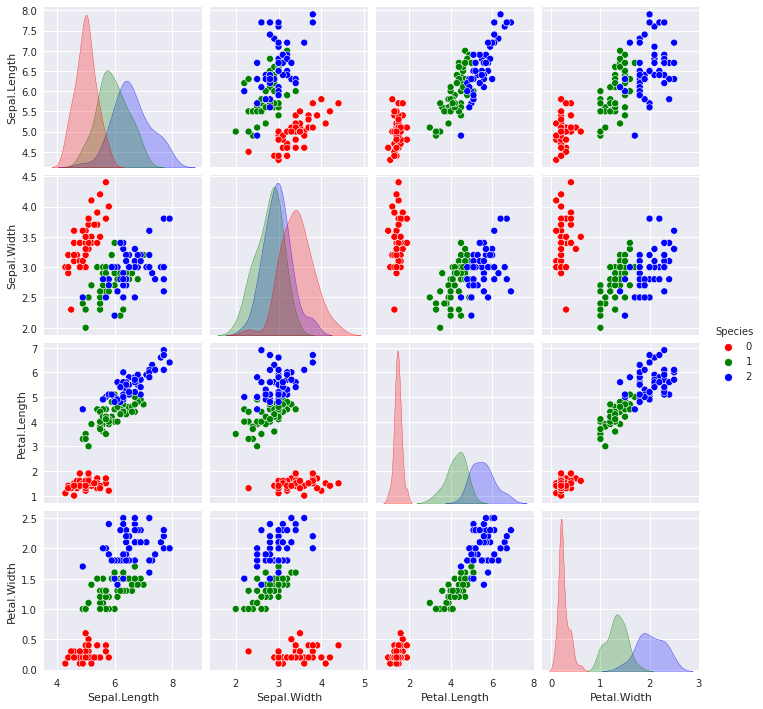

In [153]:
style.use('seaborn')
sns.pairplot(data=ird.drop(columns="slno"),hue='Species',palette=['red','green','blue'])
plt.show()

In [150]:
c1=lda.transform(x_train)[:,0]
c2=lda.transform(x_train)[:,1]

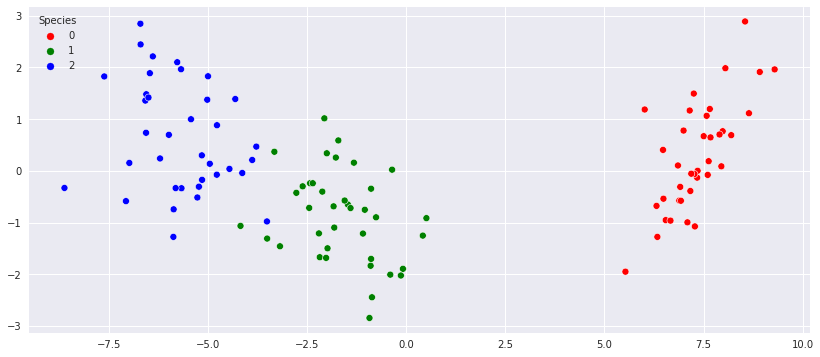

In [152]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=c1,y=c2,hue=y_train,palette=['red','green','blue'])
plt.show()

In [154]:
x_train_cmp=lda.transform(x_train)

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
lmModel=LogisticRegression()
lmModel.fit(x_train_cmp,y_train)

LogisticRegression()

In [157]:
lmModel.score(x_train_cmp,y_train)

0.9821428571428571

In [159]:
from mlxtend.plotting import plot_decision_regions

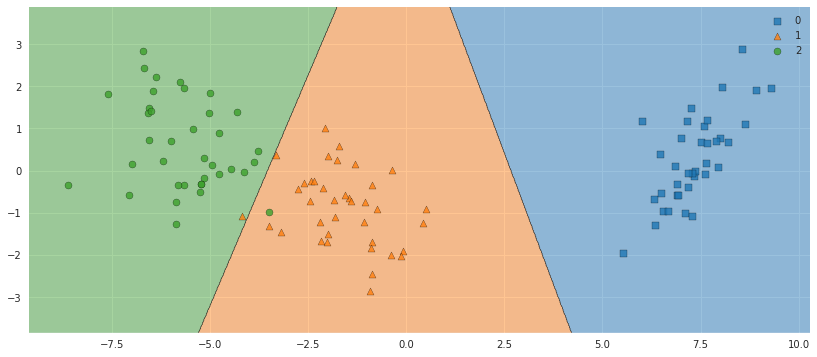

In [161]:
plt.figure(figsize=(14,6))
plot_decision_regions(x_train_cmp,y_train.values,clf=lmModel)
plt.show()

In [162]:
# Extract 1 component

In [163]:
lda1=LinearDiscriminantAnalysis(n_components=1)
lda1.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=1)

In [164]:
x_train_cmp=lda1.transform(x_train)

In [168]:
cmp_one=x_train_cmp.flatten()

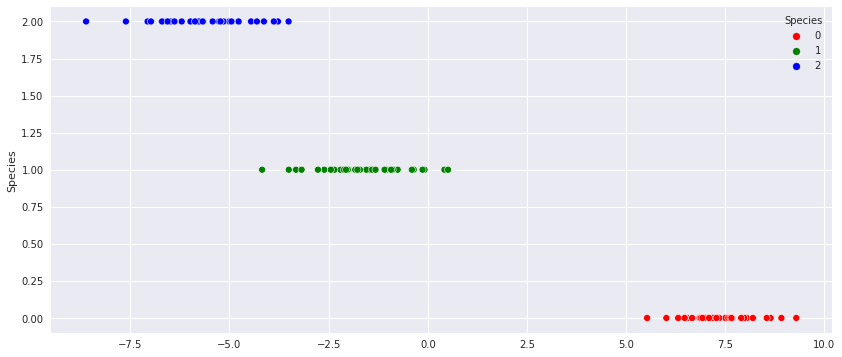

In [169]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=cmp_one,y=y_train,hue=y_train,palette=['red','green','blue'])
plt.show()